#Paquetes necesarios

In [128]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Carga imagen desde archivo y convierte a RGB

(512, 512, 3)


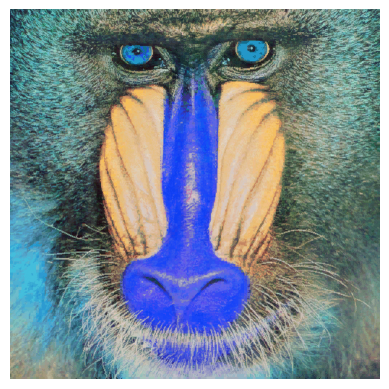

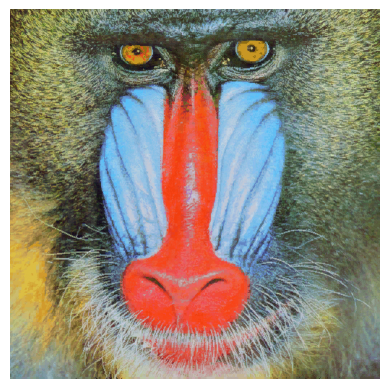

In [129]:
#Lee imagen de archivo
img = cv2.imread('../P2/mandril.jpg') 

#Si hay lectura correcta
if img is not None:
    #Muestra dimensiones
    print(img.shape)
    #Mostramos la imagen original con matplotlib
    plt.figure()
    #Eliminamos etiquetas de los ejes
    plt.axis("off")
    plt.imshow(img) 
    plt.show()

    #Recordar que OpenCV lee las imágenes almacenando en formato BGR, por lo que convertimos para visualizr de forma correcta a RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #Muestra la imagen tras convertir a RGB
    #Eliminamos etiquetas de los ejes
    plt.figure()
    plt.axis("off")
    plt.imshow(img_rgb) 
    plt.show()
else: 
    print('Imagen no encontrada')

Convierte a grises para procesar

(512, 512)


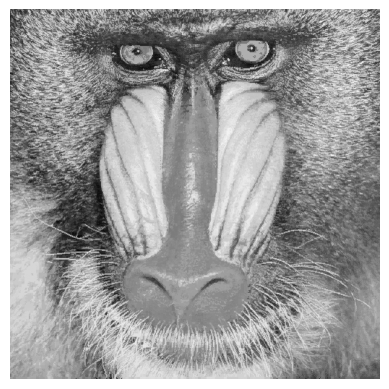

In [130]:
#Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gris.shape)
#Muestra, indicando el mapa de color de grises con matplotlib
plt.figure()
#Eliminamos etiquetas de los ejes
plt.axis("off")
plt.imshow(gris, cmap='gray') 
plt.show()


Canny, detector de contornos multietapa. Tratado en las sesiones de teoría (tema 4)

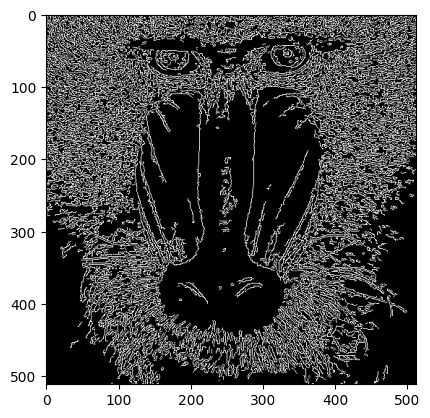

In [131]:
#Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 100, 200)
#print(canny) #Muestra contenido, valores 0 o 255
#Visualiza resultado
plt.imshow(canny, cmap='gray') 
plt.show()


Contar el número de píxeles no nulos por columna y visualizar

(0.0, 512.0)

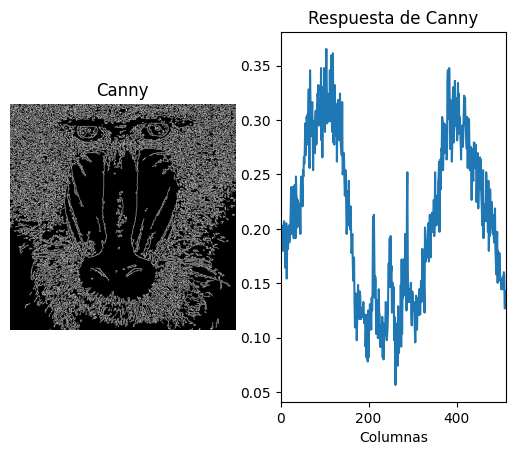

In [132]:
#El contenido de la imagen resultado de Canny, son valores 0 o 255, lo compruebas al descomentar
#print(canny)
#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * canny.shape[1])

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[0]])

TAREA 1: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el máximo para filas y columnas (uno para cada) y muestra el número de filas con un número de píxeles blancos mayor o igual que 0.95*máximo.

Número máximo de píxeles blancos por fila: 0.4296875
Número máximo de píxeles blancos por columnas: 0.365234375
Número de filas con píxeles blancos >= 95% del máximo: 2


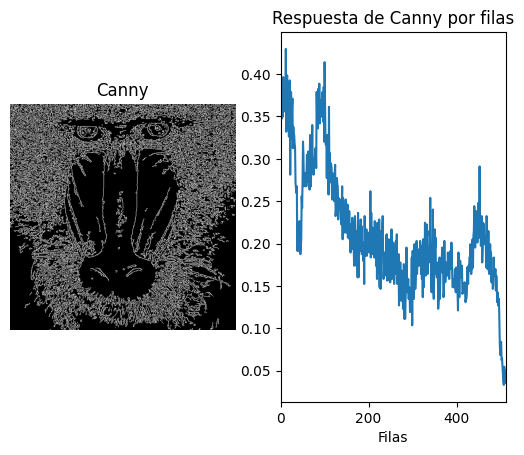

In [133]:
# Cuenta el número de píxeles blancos (255) por fila (imagen canny, 1 es filas, suma de pixeles por fila, tipo datos de salida 32 bits) 
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
# Normaliza en base al número de columnas y al valor máximo del píxel (255)
# El resultado será el número de píxeles blancos por fila
rows = row_counts[:, 0] / (255 * canny.shape[1])
# Ahora calculamos el máximo número de píxeles blancos por fila
max_rows = np.max(rows)
# También contamos el número de filas con píxeles blancos >= 95% del máximo
threshold_rows = 0.95 * max_rows
contador_filas = np.sum(rows >= threshold_rows)


#Lo mismo de antes pero para las columnas
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
# Normaliza por el número de filas y valor máximo del píxel (255)
cols = col_counts[0] / (255 * canny.shape[0])
# Calcula el número máximo de píxeles blancos por columna
max_cols = np.max(cols)

# Mostrar gráficamente la cuenta por filas
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny por filas")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
plt.xlim([0, canny.shape[0]])

# Mostrar el resultado
print(f"Número máximo de píxeles blancos por fila: {max_rows}")
print(f"Número máximo de píxeles blancos por columnas: {max_cols}")
print(f"Número de filas con píxeles blancos >= 95% del máximo: {contador_filas}")

plt.show()


Sobel. Cuando hay un borde, el valor de intensidad de los píxeles cercanos cambia de forma notable, calcular las derivadas proporciona una evidencia de dicho cambio. El operador de Sobel aproxima el cálculo de la derivada aplicando un kernel de tamaño impar basado en el patrón [1 2 1].

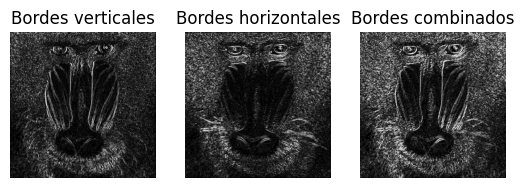

In [134]:
# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

#Muestra ambos resultados
plt.figure()
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title('Bordes verticales')
#Verticales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Prueba sin convertir escala

plt.subplot(1, 3, 2)
plt.axis("off")
plt.title('Bordes horizontales')
#Horizontales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Prueba sin convertir escala

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title('Bordes combinados')
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobel), cmap='gray') 
#plt.imshow(sobel, cmap='gray') #Prueba sin convertir escala
plt.show()

Umbralizado de una imagen

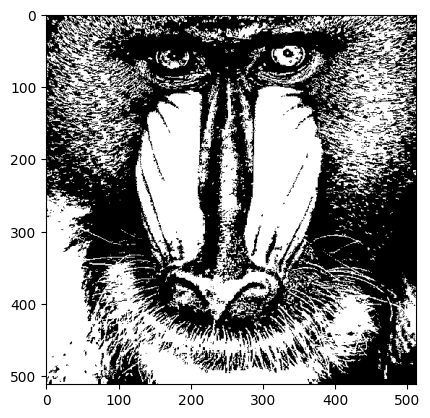

In [125]:
#Define valor umbral
valorUmbral = 130 #Prueba otros valores
#Obtiene imagen umbralizada para dicho valor definido
res, imagenUmbralizada = cv2.threshold(gris, valorUmbral, 255, cv2.THRESH_BINARY)
#Muestra resultado
plt.imshow(imagenUmbralizada, cmap='gray') #Visualiza con mapa de color gris
plt.show()

El histograma de una imagen aporta información sobre el valor de umbral a elegir para ciertas situaciones

(0.0, 256.0)

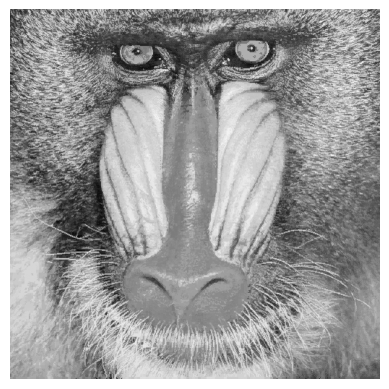

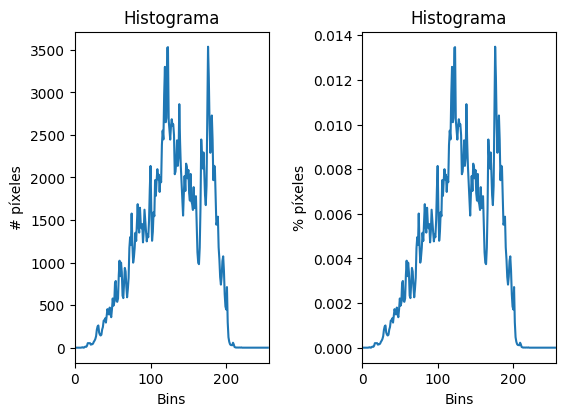

In [135]:
#Cálculo del histograma de una imagen en escala de grises
hist = cv2.calcHist([gris], [0], None, [256], [0, 256])

plt.figure()
plt.axis("off")
plt.imshow(gris, cmap='gray')

# Histograma sin normalizar
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

#Normaliza el histograma en base al número de píxeles y lo muestra
hist /= hist.sum()

plt.subplot(1, 2, 2)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("% píxeles")
plt.tight_layout(pad=3.0) #separación entre plots
plt.plot(hist)
plt.xlim([0, 256])

TAREA 2: Aplica umbralizado a la imagen resultante de Sobel (valores 0 a 255 y convertida a 8 bits por ejemplo sobel8 = np.uint8(sobel)), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny. Calcula los máximos por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

Número máximo de píxeles no nulos en filas (maxfill): 149
Filas con píxeles no nulos >= 0.95 * maxfill: [126]
Número máximo de píxeles no nulos en columnas (maxfill): 163
Columnas con píxeles no nulos >= 0.95 * maxfill: [ 0  4 85 92]


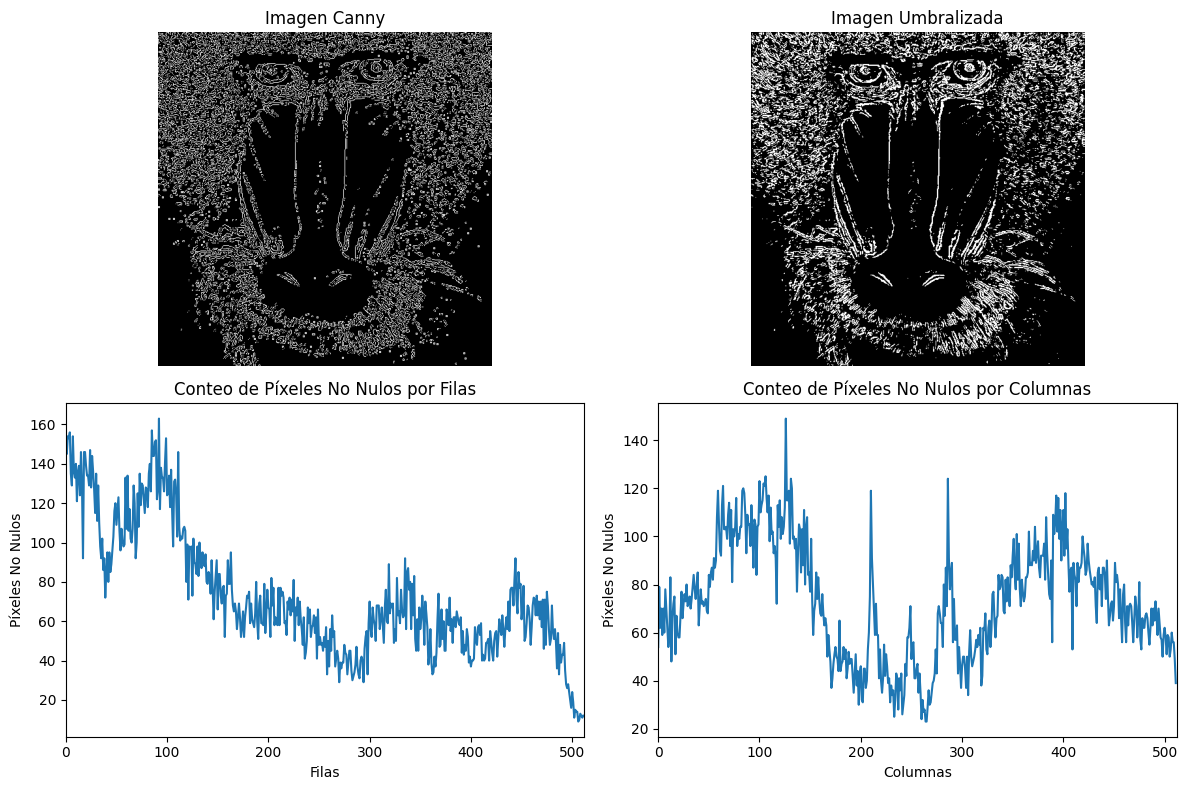

In [145]:


# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

# Calcula gradientes sobel en ambas direcciones (horizontal y vertical), para detectar cambios de intensidad
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y

# Convertimos el Sobel a 8 bits
sobelx = np.uint8(np.absolute(sobelx))
sobely = np.uint8(np.absolute(sobely))

# Combina ambos resultados, se suman gradientes para resaltar bordes
sobel = cv2.add(sobelx, sobely)

# Define el valor umbral, los que superan el umbral se asignan a 255 color blanco
valorUmbral = 140
res, imagenUmbralizada = cv2.threshold(sobel, valorUmbral, 255, cv2.THRESH_BINARY)

# Aplica Canny a la imagen umbralizada
canny = cv2.Canny(imagenUmbralizada, 100, 200)

# Recojo los píxeles no nulos (filas)
col_no_nulo = np.array([cv2.countNonZero(canny[i:i+1, :]) for i in range(canny.shape[0])])

# Recojo los píxeles no nulos (columnas)
row_no_nulo = np.array([cv2.countNonZero(canny[:, j:j+1]) for j in range(canny.shape[1])])

# Encuentra los máximos por filas y columnas
maxfill_rows = np.max(row_no_nulo)
maxfill_cols = np.max(col_no_nulo)

# Encuentra las filas y columnas con un número de píxeles no nulos por encima del 0.95% * máximo
threshold_rows = 0.95 * maxfill_rows
indices_rows = np.where(row_no_nulo >= threshold_rows)[0]

threshold_cols = 0.95 * maxfill_cols
indices_cols = np.where(col_no_nulo >= threshold_cols)[0]

print("Número máximo de píxeles no nulos en filas (maxfill):", maxfill_rows)
print("Filas con píxeles no nulos >= 0.95 * maxfill:", indices_rows)

print("Número máximo de píxeles no nulos en columnas (maxfill):", maxfill_cols)
print("Columnas con píxeles no nulos >= 0.95 * maxfill:", indices_cols)

# Mostrar gráficamente el número de píxeles no nulos en filas y columnas
plt.figure(figsize=(12, 8))

# Mostrar la imagen de Canny
plt.subplot(2, 2, 1)
plt.axis("off")
plt.title("Imagen Canny")
plt.imshow(canny, cmap='gray') 

# Mostrar la imagen umbralizada al lado de la imagen Canny
plt.subplot(2, 2, 2)
plt.axis("off")
plt.title("Imagen Umbralizada")
plt.imshow(imagenUmbralizada, cmap='gray')

# Graficar la cuenta de píxeles no nulos por filas
plt.subplot(2, 2, 3)
plt.title("Conteo de Píxeles No Nulos por Filas")
plt.xlabel("Filas")
plt.ylabel("Píxeles No Nulos")
plt.plot(col_no_nulo)
plt.xlim([0, canny.shape[0]])

# Graficar la cuenta de píxeles no nulos por columnas
plt.subplot(2, 2, 4)
plt.title("Conteo de Píxeles No Nulos por Columnas")
plt.xlabel("Columnas")
plt.ylabel("Píxeles No Nulos")
plt.plot(row_no_nulo)
plt.xlim([0, canny.shape[1]])

# Mostrar el resultado final
plt.tight_layout()
plt.show()


Diferencia de imágenes

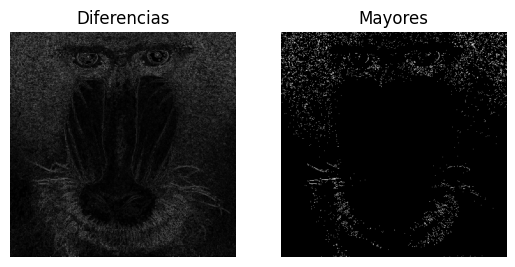

In [137]:
#Calcula la diferencia entre dos imágenes
#Utiliza la imagen original y la obtenida tras aplicar la gaussiana (creada en la celda dedicada a Sobel)
dif = cv2.absdiff(gris, ggris)

#Visualiza
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Diferencias")
plt.axis("off")
plt.imshow(dif, cmap='gray') 

#Zonas de mayor diferencia tras aplicar umbral
res, imgdif = cv2.threshold(dif, 30, 255, cv2.THRESH_BINARY)
#Visualiza
plt.subplot(1, 2, 2)
plt.title("Mayores")
plt.axis("off")
plt.imshow(imgdif, cmap='gray') 
plt.show()


Webcam y sustracción de fotogramas

In [138]:
vid = cv2.VideoCapture(0)

#Marca de inicio
disponible = 0 
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        if disponible > 0:
            dif = cv2.absdiff(frame, pframe)        
            # Muestra resultado
            cv2.imshow('Diferencia', dif)        

        else:
            disponible = 1

        #Copia fotograma actual para la diferencia en el siguiente forograma
        pframe = frame.copy()
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

Webcam y sustracción de modelo del fondo

In [143]:
vid = cv2.VideoCapture(0)

# Fondo
# Inicializa la sustracción del fondo con mezcla de gaussianas y detección de sombrasº
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Aplica efecto espejo sobre la entrada
        framem=cv2.flip(frame, 1)

        
        #Con un segundo parámerto se puede definir máscara con zonas a actualizar
        objetos = eliminadorFondo.apply(framem)
        #objetos = eliminadorFondo.apply(framem, objetos, 0)  #No actualiza el fondo
        # Obtiene fondo
        background = eliminadorFondo.getBackgroundImage()

        # Muestra resultado
        cv2.imshow('Fotograma', objetos)
        # Muestra fondo
        cv2.imshow('Fondo', background)
  
   
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()


TAREA 3: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, incluya al menos dos usos diferentes de aplicar las funciones de OpenCV trabajadas hasta ahora.


In [148]:

# Iniciar captura de video
cap = cv2.VideoCapture(0)

while True:
    # Capturar frame de la cámara
    ret, frame = cap.read()
    
    if not ret:
        print("Error al capturar imagen")
        break
    
    # Convertir a escala de grises
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Aplicar Sobel
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)  # Sobel en el eje X
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)  # Sobel en el eje Y
    sobel_combined = cv2.addWeighted(np.abs(sobelx), 0.5, np.abs(sobely), 0.5, 0)
    
    # Convertir a 8 bits
    sobel_8u = np.uint8(sobel_combined)
    
    # Aplicar Canny
    canny = cv2.Canny(gray, 100, 200)
    
    # Mostrar las tres imágenes en una sola ventana
    combined = np.hstack((frame, cv2.cvtColor(sobel_8u, cv2.COLOR_GRAY2BGR), cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)))
    
    # Mostrar en ventana
    cv2.imshow('Original | Sobel | Canny', combined)
    
    # Salir con la tecla 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar captura de video y cerrar ventanas
cap.release()
cv2.destroyAllWindows()


TAREA 4: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) plantear una reinterpretación de la parte de procesamiento de la imagen tomando como punto de partida alguna de dichas instalaciones.

In [144]:

# Iniciar captura de video desde la webcam
cap = cv2.VideoCapture(0)

# Obtener dimensiones de la cámara
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Crear una imagen negra donde se dibujarán los efectos gráficos
canvas = np.zeros((h, w, 3), dtype=np.uint8)

# Parámetros para detección de movimiento
ret, prev_frame = cap.read()
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
prev_gray = cv2.GaussianBlur(prev_gray, (21, 21), 0)

while True:
    # Capturar cada frame de la cámara
    ret, frame = cap.read()

    # Convertir a escala de grises y aplicar suavizado
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (21, 21), 0)

    # Detectar la diferencia entre el frame actual y el anterior
    delta_frame = cv2.absdiff(prev_gray, gray)
    
    # Umbralizado para identificar áreas con movimiento
    thresh_frame = cv2.threshold(delta_frame, 30, 255, cv2.THRESH_BINARY)[1]
    thresh_frame = cv2.dilate(thresh_frame, None, iterations=2)

    # Encontrar contornos del movimiento detectado
    contours, _ = cv2.findContours(thresh_frame, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Dibujar efectos visuales basados en el movimiento
    for contour in contours:
        if cv2.contourArea(contour) < 500:  # Ignorar áreas pequeñas
            continue
        # Obtener coordenadas del área con movimiento
        (x, y, w_cont, h_cont) = cv2.boundingRect(contour)
        
        # Dibujar un círculo que sigue el área de movimiento
        center = (x + w_cont // 2, y + h_cont // 2)
        radius = min(w_cont, h_cont) // 2
        color = (255, 0, 0)  # Azul
        cv2.circle(canvas, center, radius, color, 3)

        # Dibujar una línea diagonal en la dirección del movimiento
        cv2.line(canvas, (x, y), (x + w_cont, y + h_cont), (0, 255, 0), 2)

    # Superponer los efectos visuales sobre la imagen original
    combined = cv2.addWeighted(frame, 0.7, canvas, 0.3, 0)

    # Mostrar la imagen original con efectos gráficos
    cv2.imshow("Interactive Demo", combined)

    # Actualizar el frame anterior para la próxima iteración
    prev_gray = gray.copy()

    # Presionar ESC para salir
    if cv2.waitKey(20) == 27:
        break

# Liberar la cámara y cerrar las ventanas
cap.release()
cv2.destroyAllWindows()
